In [1]:
#IMPORTING LIBRARIES

In [2]:
import os
import time
import shutil
import itertools
import random
# import data handling tools 
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import categorical_crossentropy
import warnings
warnings.filterwarnings('ignore')

In [3]:
#READ DATA

In [4]:
data_dir = "hmnist_28_28_RGB.csv"
data = pd.read_csv(data_dir)

In [5]:
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [6]:
data.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


In [7]:
#DATA PREPROCESSING

In [8]:
#SPLIT DATA AND LABELS

In [9]:
Label = data["label"]
Data = data.drop(columns=["label"])

In [10]:
data["label"].value_counts()

label
4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: count, dtype: int64

In [11]:
#HANDLING IMBALANCED DATASETS

In [12]:
from imblearn.over_sampling import RandomOverSampler   #augmentation

oversample = RandomOverSampler()
Data, Label  = oversample.fit_resample(Data, Label)
Data = np.array(Data).reshape(-1, 28, 28, 3)
print('Shape of Data :', Data.shape)

Shape of Data : (46935, 28, 28, 3)


In [13]:
Label = np.array(Label)
Label

array([2, 2, 2, ..., 6, 6, 6], dtype=int64)

In [14]:
#CONVERTING ABBREVIATIONS TO ITS WORDS

In [15]:
classes = {4: ('nv', ' melanocytic nevi'),
           6: ('mel', 'melanoma'),
           2 :('bkl', 'benign keratosis-like lesions'), 
           1:('bcc' , ' basal cell carcinoma'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'),
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           3: ('df', 'dermatofibroma')}

In [16]:
#SPLITING TRAIN AND TEST

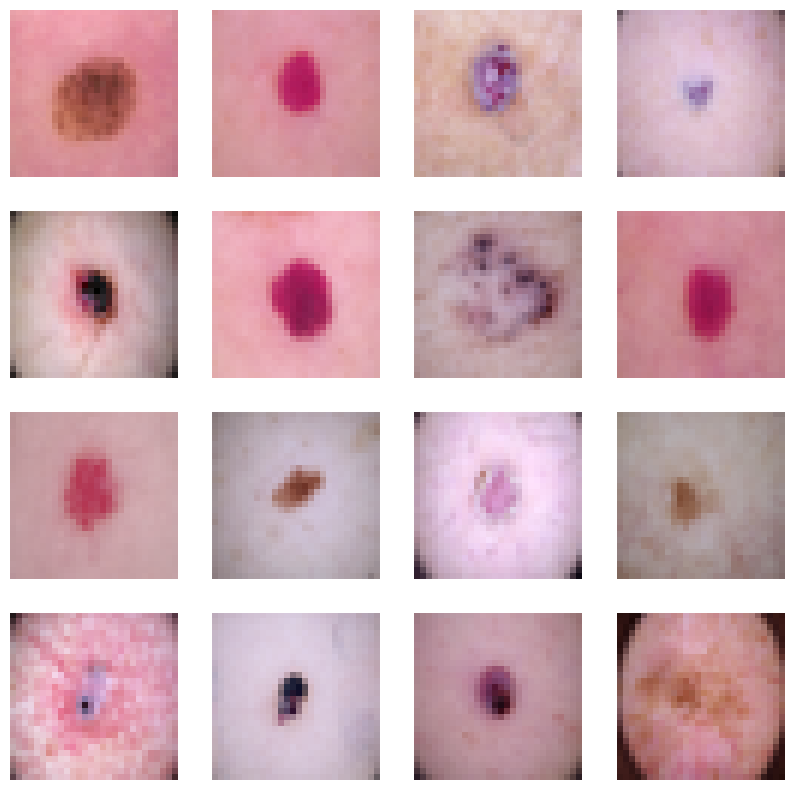

In [17]:
from sklearn.model_selection import train_test_split

# Assuming you have 'Data' and 'Label' from your previous code
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(Data, Label, test_size=0.2, random_state=42)

# Now you can use X_test in the provided code block
plt.figure(figsize=(10, 10))
for i in range(16): 
    plt.subplot(4, 4, i + 1)  # Create a subplot
    plt.imshow(X_test[i])    # Display the image
    plt.axis('off')           # Turn off axis labels
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(Data , Label , test_size = 0.25 , random_state = 49)

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(35201, 28, 28, 3)
(35201,)
(11734, 28, 28, 3)
(11734,)


In [20]:
data.describe()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
count,10015.000000,10015.000000,10015.00000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,...,10015.00000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000
mean,181.056415,131.728407,141.24024,187.274488,137.089466,147.206191,192.358862,141.796405,152.211782,196.177234,...,184.68657,138.416875,144.061508,178.656216,133.217474,138.752172,172.307239,127.871193,133.144483,3.720919
std,59.746698,45.043473,48.67267,54.021274,41.138096,44.661091,48.267713,37.382709,40.725174,43.892249,...,47.02376,38.393007,41.322365,53.534096,42.910723,45.642257,58.533979,46.453818,49.060028,1.347499
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,158.000000,117.000000,123.00000,165.000000,122.000000,130.000000,170.000000,127.000000,135.000000,174.000000,...,166.00000,123.000000,126.000000,160.000000,118.000000,120.000000,153.000000,113.000000,115.000000,4.000000
50%,198.000000,141.000000,151.00000,201.000000,144.000000,155.000000,204.000000,146.000000,157.000000,205.000000,...,197.00000,144.000000,149.000000,195.000000,141.000000,146.000000,191.000000,138.000000,142.000000,4.000000
75%,224.000000,159.000000,172.00000,226.000000,162.000000,174.000000,227.000000,163.000000,177.000000,228.000000,...,216.00000,161.000000,169.000000,214.000000,159.000000,166.000000,212.000000,156.000000,163.000000,4.000000
max,255.000000,246.000000,255.00000,254.000000,246.000000,254.000000,255.000000,251.000000,255.000000,255.000000,...,255.00000,254.000000,254.000000,254.000000,252.000000,255.000000,254.000000,249.000000,254.000000,6.000000


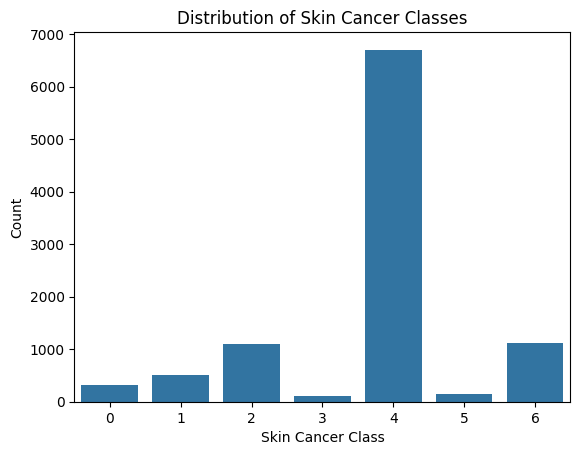

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram of label counts
sns.countplot(data=data, x='label')
plt.xlabel('Skin Cancer Class')
plt.ylabel('Count')
plt.title('Distribution of Skin Cancer Classes')
plt.show()

In [22]:
#Convert labels to categorical types

In [23]:
from tensorflow.keras.utils import to_categorical

# Your other code...

# Convert labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [24]:
y_train.shape

(35201, 7)

In [25]:
print(y_train[0])

[0. 0. 0. 1. 0. 0. 0.]


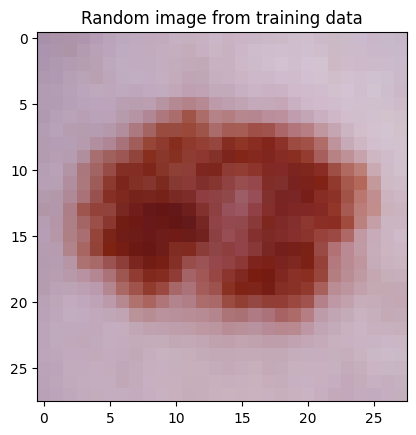

In [26]:
ind= random.randint(1,10000)
plt.imshow(X_train[ind], cmap='gray')
# plt.axis('off')
plt.title("Random image from training data")
plt.show()

In [27]:
#Model Structure

In [28]:
model = keras.models.Sequential()

# Create Model Structure
model.add(keras.layers.Input(shape=[28, 28, 3]))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

# model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
# model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
# model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(rate=0.2))
# model.add(keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'))
# model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.L1L2()))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=7, activation='softmax'))
model.compile(Adam(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)         

In [29]:
#Training model

In [30]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the learning rate reduction callback
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

# Use the callback in model.fit()
history = model.fit(X_train ,
                    y_train ,
                    epochs=25,
                    batch_size=128,
                    validation_data=(X_test , y_test) ,
                    callbacks=[learning_rate_reduction])

Epoch 1/25


276/276 [==============================] - 41s 134ms/step - loss: 0.8107 - accuracy: 0.7173 - val_loss: 0.6927 - val_accuracy: 0.7388 - lr: 0.0010
Epoch 2/25
276/276 [==============================] - 34s 122ms/step - loss: 0.3297 - accuracy: 0.8876 - val_loss: 0.3048 - val_accuracy: 0.8883 - lr: 0.0010
Epoch 3/25
276/276 [==============================] - 34s 122ms/step - loss: 0.2066 - accuracy: 0.9280 - val_loss: 0.2254 - val_accuracy: 0.9177 - lr: 0.0010
Epoch 4/25
276/276 [==============================] - 34s 122ms/step - loss: 0.1622 - accuracy: 0.9423 - val_loss: 0.6036 - val_accuracy: 0.7936 - lr: 0.0010
Epoch 5/25
275/276 [============================>.] - ETA: 0s - loss: 0.1243 - accuracy: 0.9569
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
276/276 [==============================] - 33s 121ms/step - loss: 0.1244 - accuracy: 0.9569 - val_loss: 0.2782 - val_accuracy: 0.9028 - lr: 0.0010
Epoch 6/25
276/276 [===========================

In [31]:
from keras.utils import to_categorical

# Assuming y_train is your categorical labels
y_train_encoded = to_categorical(y_train, num_classes=7)

In [32]:
y_test_encoded = to_categorical(y_test, num_classes=7)

In [33]:
#Show training history

In [34]:
def plot_training(hist):
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'
    
    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout
    plt.show()

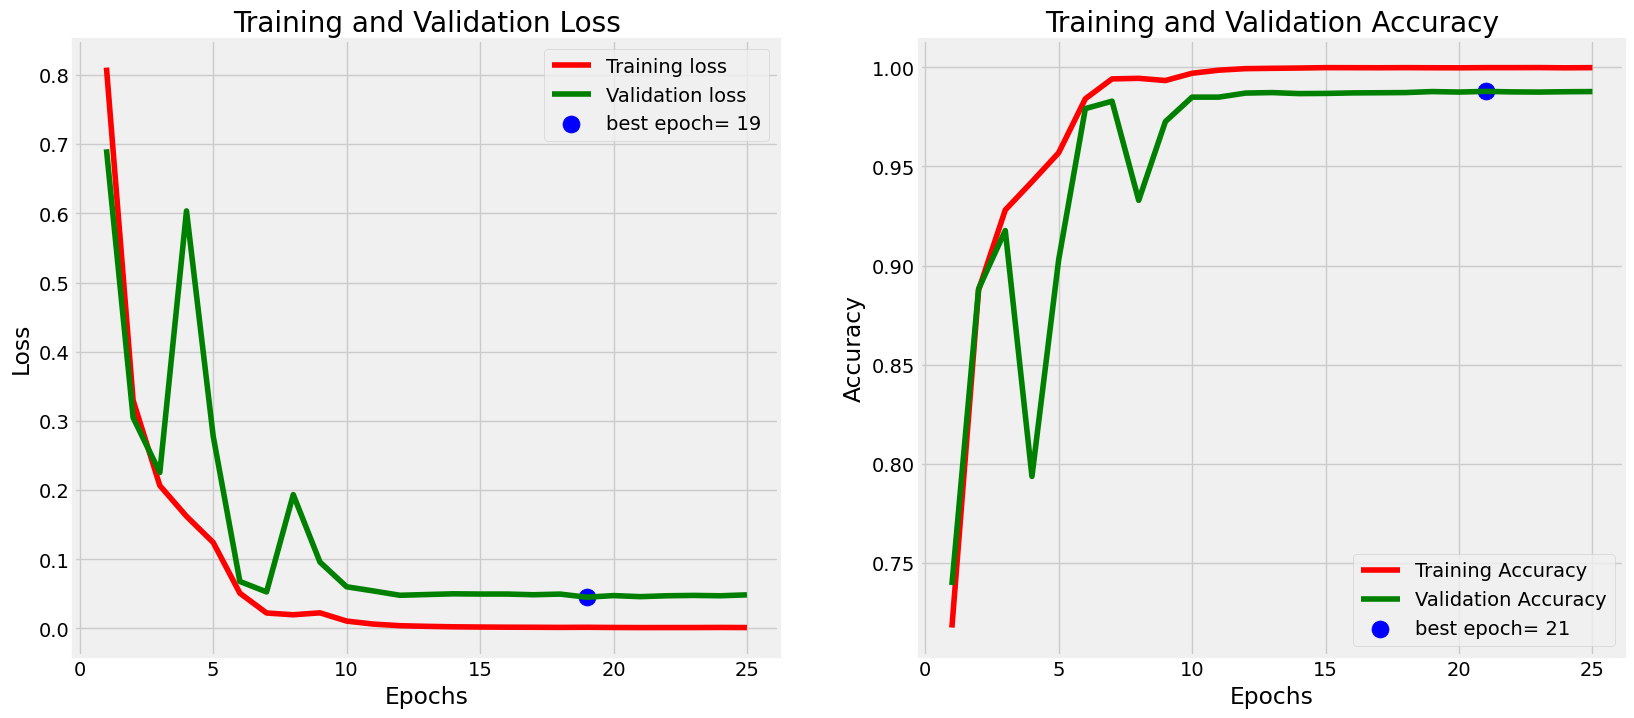

In [35]:
plot_training(history)

In [36]:
#Model Evaluation

In [37]:
train_score = model.evaluate(X_train, y_train, verbose= 1)
test_score = model.evaluate(X_test, y_test, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

367/367 [==============================] - 5s 13ms/step - loss: 0.0486 - accuracy: 0.9878
Train Loss:  0.0005350156570784748
Train Accuracy:  0.9999147653579712
--------------------
Test Loss:  0.04862631484866142
Test Accuracy:  0.9878131747245789


In [38]:
y_true = np.array(y_test)
y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred , axis=1)
y_true = np.argmax(y_true , axis=1)

367/367 [==============================] - 4s 11ms/step


In [39]:
#CREATE CLASSES LABELS

In [40]:
classes_labels = []
for key in classes.keys():
    classes_labels.append(key)

print(classes_labels)

[4, 6, 2, 1, 5, 0, 3]


In [41]:
#SAVE THE MODEL

In [42]:
model.save("skin_cancer.h5")

In [43]:
#Testing and Prediction

1/1 [==============================] - 0s 298ms/step
[9.9999428e-01 1.0956611e-06 6.6333200e-07 1.2205687e-06 2.1877943e-06
 2.2401667e-07 4.1517615e-07]
('akiec', 'Actinic keratoses and intraepithelial carcinomae')


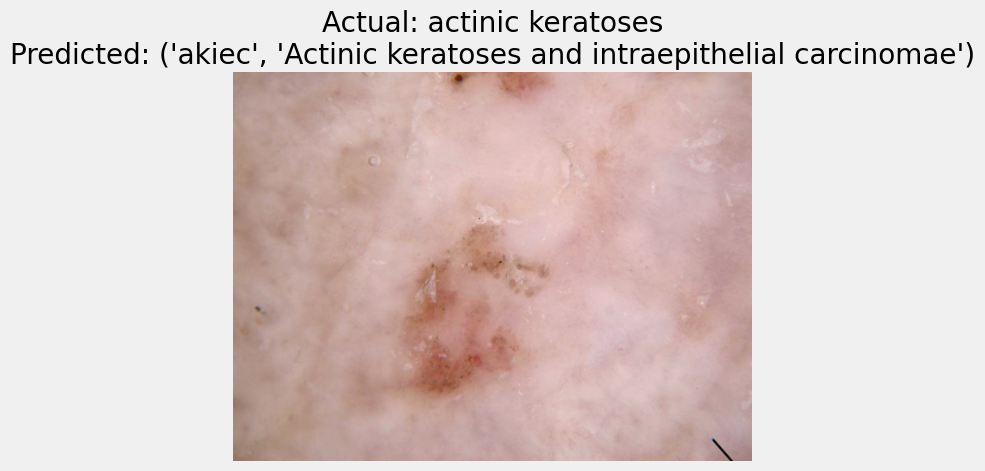

1/1 [==============================] - 0s 34ms/step
[2.47227331e-06 9.99797046e-01 1.21666286e-04 5.15784850e-05
 2.19680915e-05 7.23374910e-07 4.52120912e-06]
('bcc', ' basal cell carcinoma')


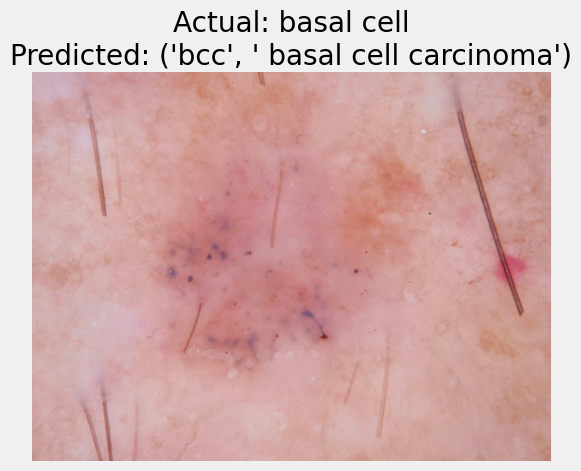

1/1 [==============================] - 0s 32ms/step
[1.59615065e-05 1.51369895e-05 9.98891890e-01 1.62110905e-06
 1.07406592e-03 6.07259443e-09 1.36055417e-06]
('bkl', 'benign keratosis-like lesions')


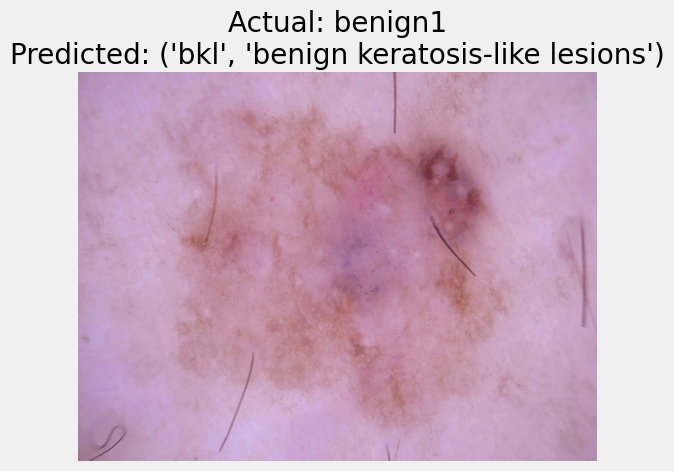

1/1 [==============================] - 0s 27ms/step
[4.4723834e-07 1.8441055e-05 8.5727552e-06 9.9995446e-01 1.0884970e-06
 1.5303591e-05 1.6991506e-06]
('df', 'dermatofibroma')


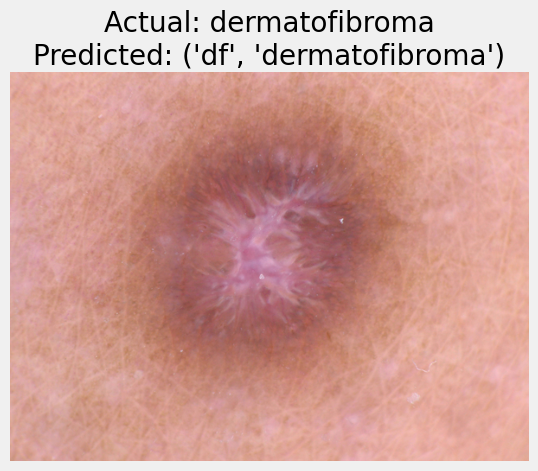

1/1 [==============================] - 0s 32ms/step
[1.37370616e-05 4.08652159e-06 7.32699482e-05 1.06329608e-05
 9.99883175e-01 1.11899235e-05 3.96599717e-06]
('nv', ' melanocytic nevi')


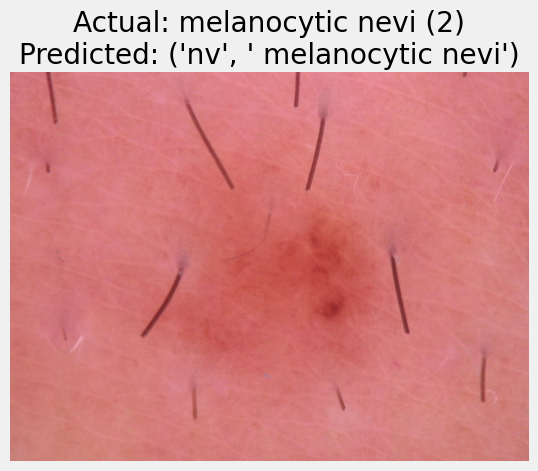

1/1 [==============================] - 0s 33ms/step
[5.3121371e-06 3.1636169e-08 8.8170515e-07 8.6142464e-08 2.3627629e-06
 1.0023601e-06 9.9999046e-01]
('mel', 'melanoma')


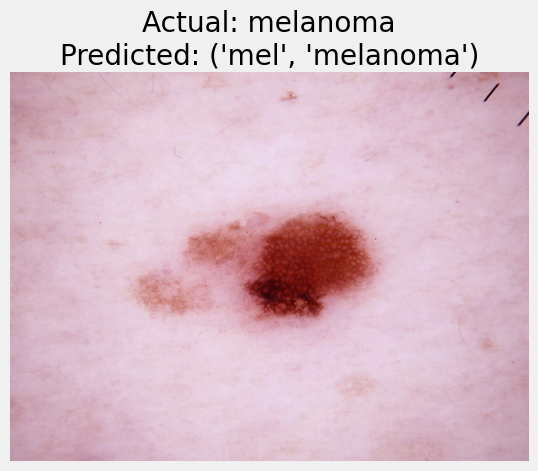

1/1 [==============================] - 0s 32ms/step
[5.7048019e-06 4.0700281e-05 1.8542180e-06 1.5945376e-05 9.1540560e-06
 9.9992001e-01 6.6640951e-06]
('vasc', ' pyogenic granulomas and hemorrhage')


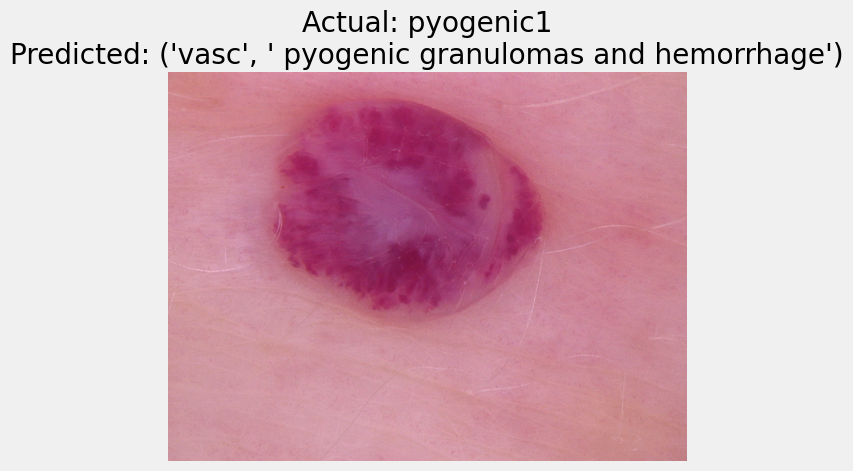

In [44]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

# Assuming 'model' and 'classes' are defined somewhere in your code
# Example:
# model = load_model('your_model.h5')
# classes = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7']

# Define the folder path containing the images
folder_path = "C:\\Users\\srika\\skin\\disease"

# List all files in the folder
files = os.listdir(folder_path)

# Iterate over each file in the folder
for filename in files:
    # Construct the full file path
    file_path = os.path.join(folder_path, filename)
    
    # Open the image file
    image = Image.open(file_path)
    
    # Resize the image to (28, 28)
    image = image.resize((28, 28))
    
    # Convert the image to a NumPy array
    img = np.array(image)
    
    # Perform further operations on img if needed
    # For example:
    # img = x_test[1]
    img = np.array(image).reshape(-1, 28, 28, 3)
    result = model.predict(img)
    print(result[0])
    result = result.tolist()
    max_prob = max(result[0])
    class_ind = result[0].index(max_prob)
    print(classes[class_ind])

    # Display each image along with its file name and full path
    # Load the image
    image = Image.open(file_path)

    # Display the image along with its file name and full path
    plt.imshow(image)
    plt.title(f"Actual: {os.path.splitext(filename)[0]}\nPredicted: {classes[class_ind]}")
    plt.axis('off')
    plt.show()


In [45]:
#FINDING PARAMETERS

In [46]:
print(classification_report(y_true,y_pred,labels=classes_labels))

              precision    recall  f1-score   support

           4       0.99      0.92      0.96      1663
           6       0.96      1.00      0.98      1755
           2       0.98      1.00      0.99      1651
           1       0.99      1.00      1.00      1689
           5       1.00      1.00      1.00      1680
           0       1.00      1.00      1.00      1667
           3       1.00      1.00      1.00      1629

    accuracy                           0.99     11734
   macro avg       0.99      0.99      0.99     11734
weighted avg       0.99      0.99      0.99     11734

